In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
train_data = pd.read_csv('kaggle_data/train_titanic.csv')
test_data = pd.read_csv('kaggle_data/test_titanic.csv')

In [20]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [22]:
train_data = train_data.drop(['PassengerId', 'Name'], axis=1)
test_data = test_data.drop(['PassengerId', 'Name'], axis=1)

In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


<Axes: xlabel='Age', ylabel='Survived'>

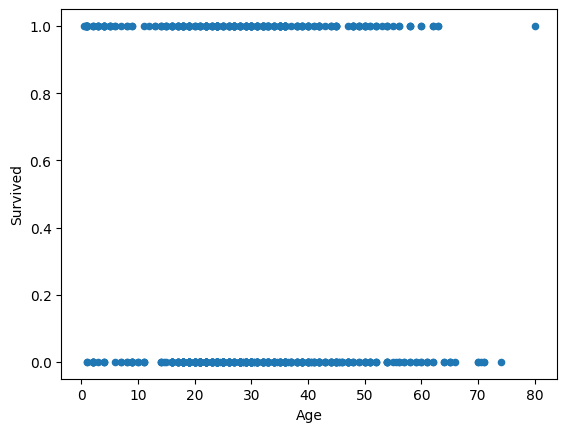

In [24]:
train_data.plot.scatter(x='Age', y='Survived')

In [25]:
train_data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [26]:
for col in train_data.columns:
    print(train_data[col].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64
Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64
Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26   

### 1. Handle Missing Values

In [27]:
dic = {}
for col in train_data.columns:
    dic[col] = (train_data[col].isna().sum() / len(train_data)) * 100

print(f'train data: {dic}')

dic2 = {}
for col in test_data.columns:
    dic2[col] = (test_data[col].isna().sum() / len(test_data)) * 100

print(f'test data: {dic2}')

train data: {'Survived': 0.0, 'Pclass': 0.0, 'Sex': 0.0, 'Age': 19.865319865319865, 'SibSp': 0.0, 'Parch': 0.0, 'Ticket': 0.0, 'Fare': 0.0, 'Cabin': 77.10437710437711, 'Embarked': 0.22446689113355783}
test data: {'Pclass': 0.0, 'Sex': 0.0, 'Age': 20.574162679425836, 'SibSp': 0.0, 'Parch': 0.0, 'Ticket': 0.0, 'Fare': 0.23923444976076555, 'Cabin': 78.22966507177034, 'Embarked': 0.0}


In [28]:
train_data = train_data.drop('Cabin', axis=1)
test_data = test_data.drop('Cabin', axis=1)

In [29]:
dic.pop('Cabin')
dic2.pop('Cabin')

# for train dataset
for col in train_data.columns:
    if dic[col] > 0.0:
        if train_data[col].dtype == 'object':
            train_data[col] = train_data[col].fillna(train_data[col].mode()[0])
        else:
            train_data[col] = train_data[col].fillna(train_data[col].median())

# for test dataset
for col in test_data.columns:
    if dic2[col] > 0.0:
        if test_data[col].dtype == 'object':
            test_data[col] = test_data[col].fillna(test_data[col].mode()[0])
        else:
            test_data[col] = test_data[col].fillna(test_data[col].median())

In [30]:
print(train_data.isna().sum())
print(test_data.isna().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64


In [31]:
train_data['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: >

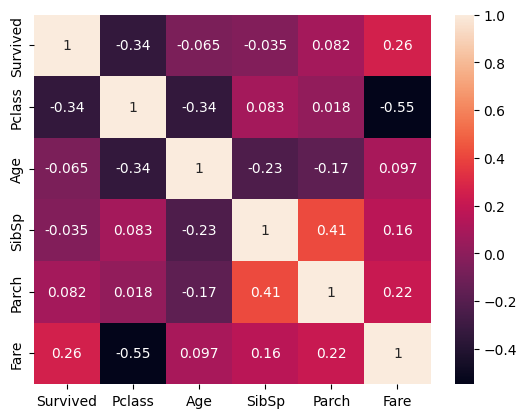

In [32]:
numeric_cols = train_data.select_dtypes(exclude=['object'])

sns.heatmap(numeric_cols.corr(), annot=True)

### 2. Handling Outliers

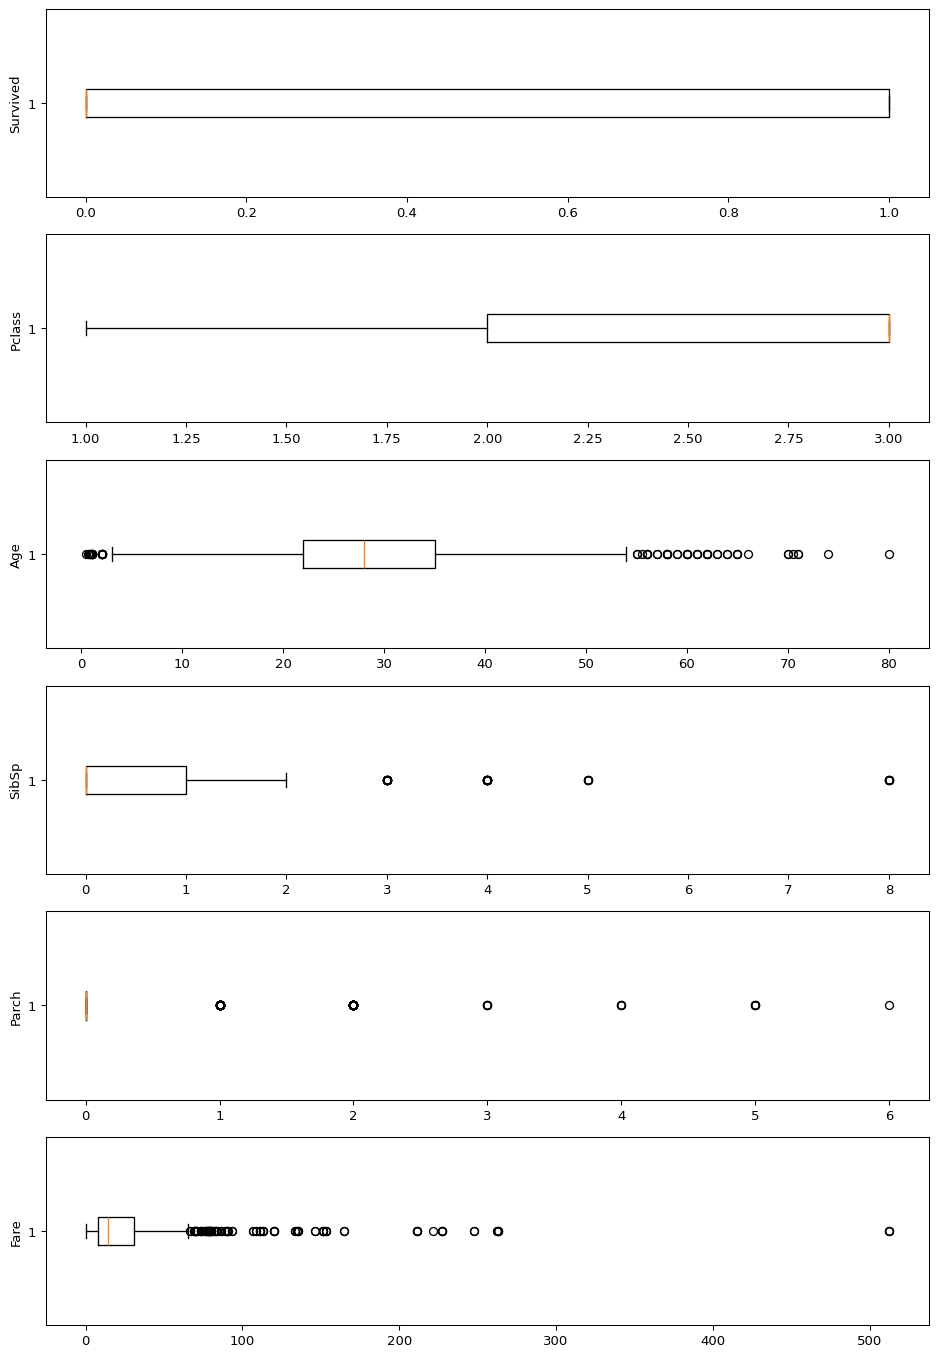

In [33]:
numeric_data = train_data.select_dtypes(exclude='object').columns

fig, axs = plt.subplots(len(numeric_data), 1, dpi=95, figsize=(12, 18))
i = 0
for col in train_data.columns:
    if train_data[col].dtype != 'object':
        axs[i].boxplot(train_data[col], vert=False)
        axs[i].set_ylabel(col)
        i += 1
plt.show()

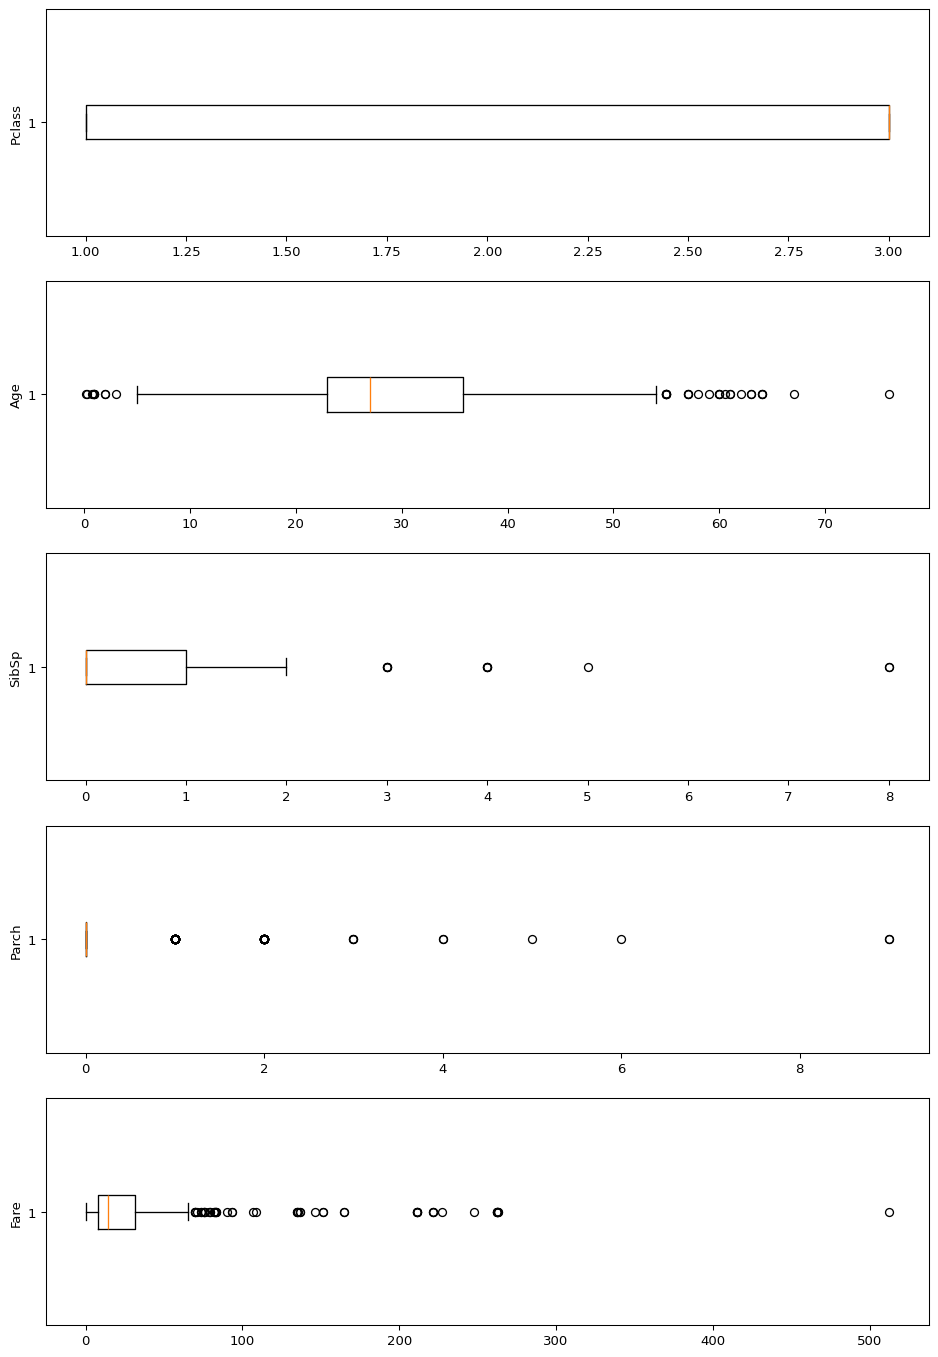

In [34]:
numeric_data = test_data.select_dtypes(exclude='object').columns

fig, axs = plt.subplots(len(numeric_data), 1, dpi=95, figsize=(12, 18))
i = 0
for col in test_data.columns:
    if test_data[col].dtype != 'object':
        axs[i].boxplot(test_data[col], vert=False)
        axs[i].set_ylabel(col)
        i += 1
plt.show()

In [35]:
# for train dataset
for col in train_data.columns:
    if train_data[col].dtype != 'object':
        lower_cap = train_data[col].quantile(0.15)
        upper_cap = train_data[col].quantile(0.85)

        train_data[col] = np.where(train_data[col] < lower_cap, lower_cap, train_data[col])
        train_data[col] = np.where(train_data[col] > upper_cap, upper_cap, train_data[col])

# for test dataset
for col in test_data.columns:
    if test_data[col].dtype != 'object':
        lower_cap = test_data[col].quantile(0.1)
        upper_cap = test_data[col].quantile(0.85)

        test_data[col] = np.where(test_data[col] < lower_cap, lower_cap, test_data[col])
        test_data[col] = np.where(test_data[col] > upper_cap, upper_cap, test_data[col])

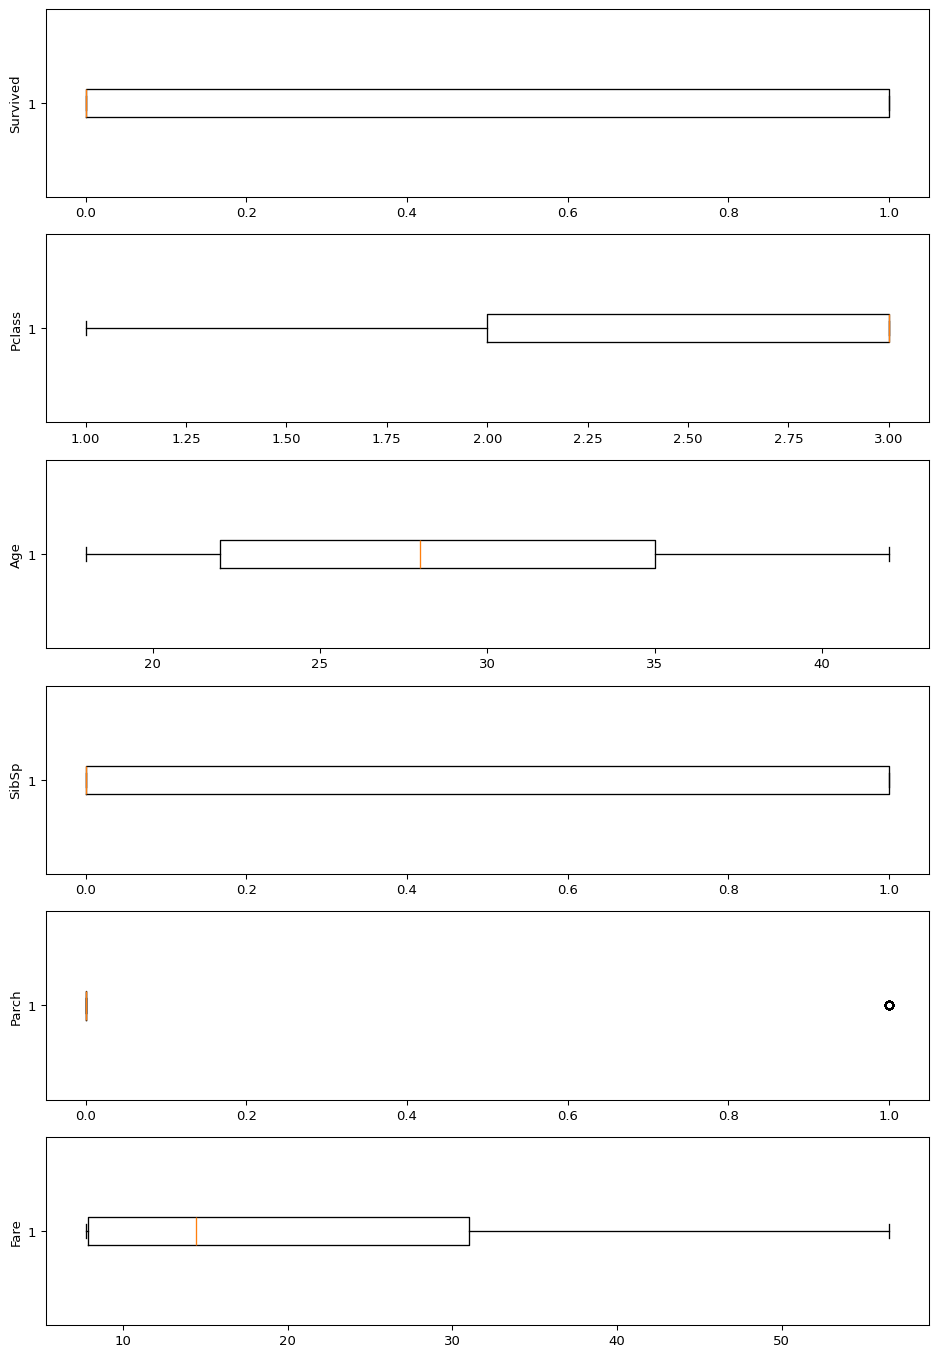

In [36]:
numeric_data = train_data.select_dtypes(exclude='object').columns

fig, axs = plt.subplots(len(numeric_data), 1, dpi=95, figsize=(12, 18))
i = 0
for col in train_data.columns:
    if train_data[col].dtype != 'object':
        axs[i].boxplot(train_data[col], vert=False)
        axs[i].set_ylabel(col)
        i += 1
plt.show()

In [37]:
train_data['Parch'].value_counts()

Parch
0.0    678
1.0    213
Name: count, dtype: int64

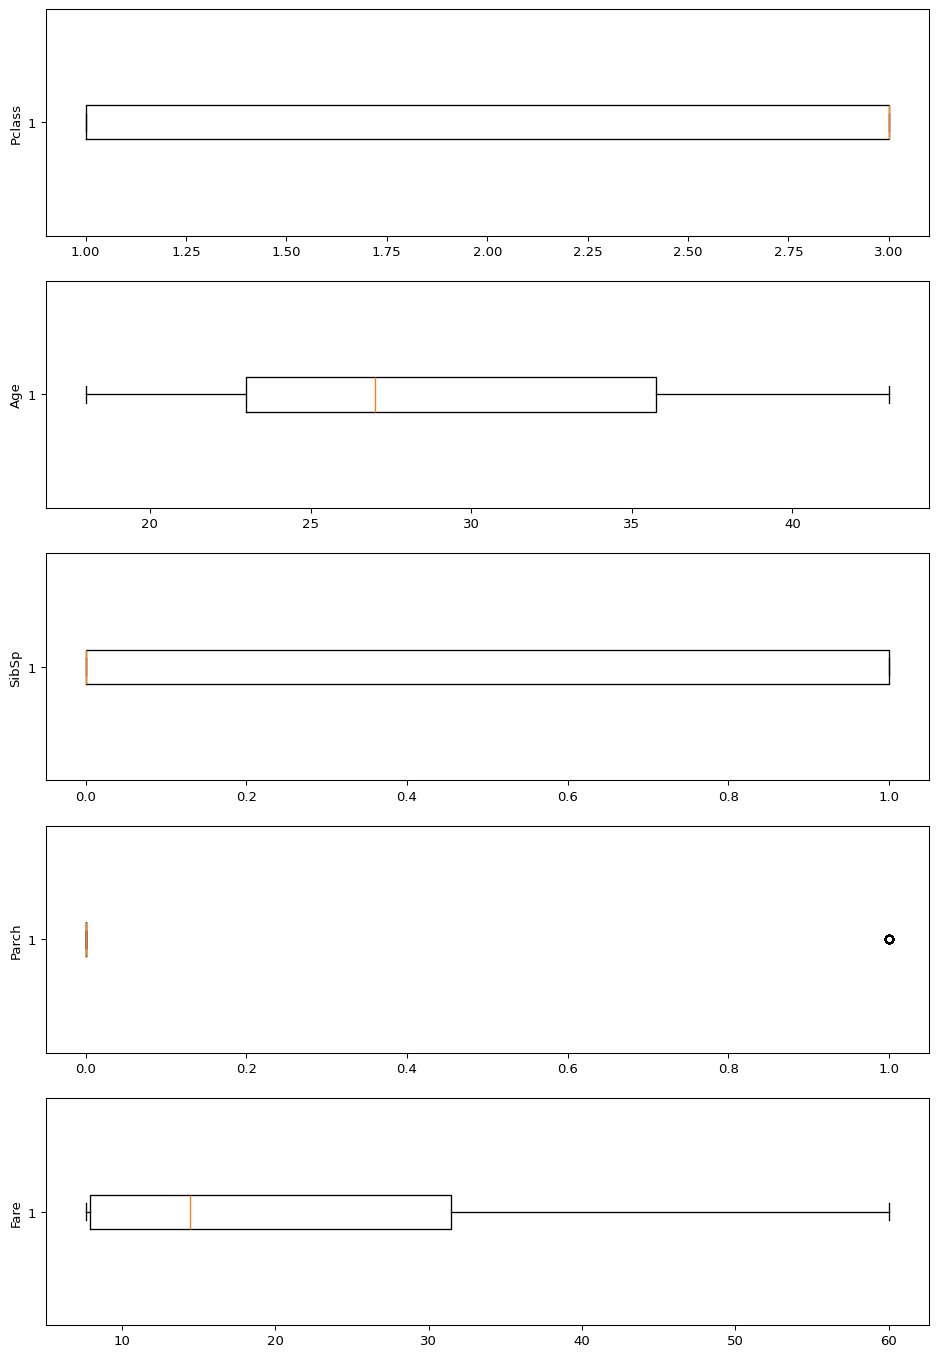

In [38]:
numeric_data = test_data.select_dtypes(exclude='object').columns

fig, axs = plt.subplots(len(numeric_data), 1, dpi=95, figsize=(12, 18))
i = 0
for col in test_data.columns:
    if test_data[col].dtype != 'object':
        axs[i].boxplot(test_data[col], vert=False)
        axs[i].set_ylabel(col)
        i += 1
plt.show()

In [39]:
for col in train_data.columns:
    print(train_data[col].value_counts())

Survived
0.0    549
1.0    342
Name: count, dtype: int64
Pclass
3.0    491
1.0    216
2.0    184
Name: count, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
Age
28.0    202
42.0    142
18.0    139
24.0     30
22.0     27
19.0     25
30.0     25
21.0     24
25.0     23
36.0     22
29.0     20
32.0     18
26.0     18
27.0     18
35.0     18
31.0     17
34.0     15
20.0     15
33.0     15
23.0     15
39.0     14
40.0     13
38.0     11
41.0      6
37.0      6
40.5      2
32.5      2
28.5      2
30.5      2
36.5      1
20.5      1
23.5      1
24.5      1
34.5      1
Name: count, dtype: int64
SibSp
0.0    608
1.0    283
Name: count, dtype: int64
Parch
0.0    678
1.0    213
Name: count, dtype: int64
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64
Fare
7.7500     140
56.4958    136
8.0500      43
13.0000     42
7.8958  

In [40]:
train_data.duplicated().sum()

39

In [41]:
train_data = train_data.drop_duplicates()

In [42]:
train_data.duplicated().sum()

0

In [43]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 852 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  852 non-null    float64
 1   Pclass    852 non-null    float64
 2   Sex       852 non-null    object 
 3   Age       852 non-null    float64
 4   SibSp     852 non-null    float64
 5   Parch     852 non-null    float64
 6   Ticket    852 non-null    object 
 7   Fare      852 non-null    float64
 8   Embarked  852 non-null    object 
dtypes: float64(6), object(3)
memory usage: 66.6+ KB


In [44]:
train_data = train_data.drop('Ticket', axis=1)
test_data = test_data.drop('Ticket', axis=1)

In [45]:
train_data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [46]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 852 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  852 non-null    float64
 1   Pclass    852 non-null    float64
 2   Sex       852 non-null    object 
 3   Age       852 non-null    float64
 4   SibSp     852 non-null    float64
 5   Parch     852 non-null    float64
 6   Fare      852 non-null    float64
 7   Embarked  852 non-null    object 
dtypes: float64(6), object(2)
memory usage: 59.9+ KB


In [47]:
train_data = pd.get_dummies(train_data, columns=['Embarked'])

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3.0,male,22.0,1.0,0.0,7.7500,False,False,True
1,1.0,1.0,female,38.0,1.0,0.0,56.4958,True,False,False
2,1.0,3.0,female,26.0,0.0,0.0,7.9250,False,False,True
3,1.0,1.0,female,35.0,1.0,0.0,53.1000,False,False,True
4,0.0,3.0,male,35.0,0.0,0.0,8.0500,False,False,True


In [48]:
train_data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [49]:
test_data = pd.get_dummies(test_data, columns=['Embarked'])

test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3.0,male,34.5,0.0,0.0,7.82920,False,True,False
1,3.0,female,43.0,1.0,0.0,7.64376,False,False,True
2,2.0,male,43.0,0.0,0.0,9.68750,False,True,False
3,3.0,male,27.0,0.0,0.0,8.66250,False,False,True
4,3.0,female,22.0,1.0,1.0,12.28750,False,False,True


In [50]:
test_data.isna().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [52]:
from sklearn.preprocessing import OneHotEncoder


for col in train_data.columns:
    if train_data[col].dtype == 'object':
        encoder = OneHotEncoder(sparse_output=False, )
        train_data = pd.get_dummies(train_data, columns=[col])

for col in test_data.columns:
    if test_data[col].dtype == 'object':
        test_data = pd.get_dummies(test_data, columns=[col])

In [56]:
train_data = pd.get_dummies(train_data, columns=['Parch'])

In [57]:
train_data.head()

,Survived,Age,SibSp,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1.0,Pclass_2.0,Pclass_3.0,Parch_0.0,Parch_1.0
0,0,22,1,7,0,0,1,0,1,0,0,1,1,0
1,1,38,1,56,1,0,0,1,0,1,0,0,1,0
2,1,26,0,7,0,0,1,1,0,0,0,1,1,0
3,1,35,1,53,0,0,1,1,0,1,0,0,1,0
4,0,35,0,8,0,0,1,0,1,0,0,1,1,0


In [ ]:
train_data = train_data.drop('Sex_female')

In [30]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,852.0,0.387324,0.487425,0.00,0.0000,0.00000,1.0000,1.0000
Pclass,852.0,2.289906,0.840649,1.00,1.7500,3.00000,3.0000,3.0000
Sex,852.0,0.649061,0.477544,0.00,0.0000,1.00000,1.0000,1.0000
Age,852.0,29.202465,8.007512,18.00,23.0000,28.00000,36.0000,42.0000
SibSp,852.0,0.294601,0.456131,0.00,0.0000,0.00000,1.0000,1.0000
Parch,852.0,0.215962,0.411730,0.00,0.0000,0.00000,0.0000,1.0000
Fare,852.0,22.401256,17.732179,7.75,7.8958,13.20835,30.0177,56.4958


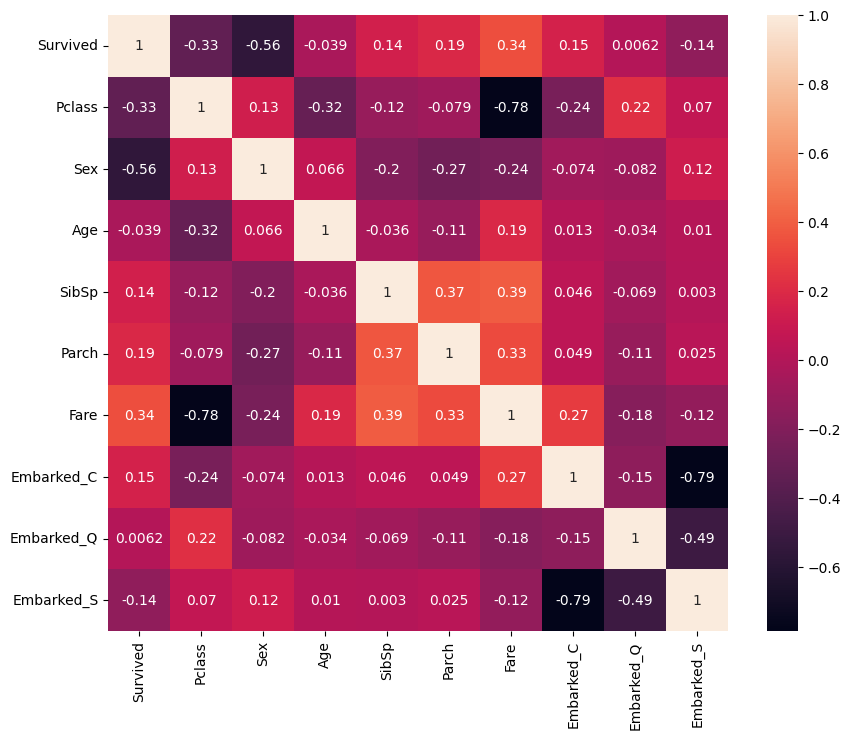

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='rocket')
plt.show()

In [32]:
train_data = train_data.drop('Pclass', axis=1)
test_data = test_data.drop('Pclass', axis=1)

In [33]:
train_data = train_data.drop('Embarked_S', axis=1)
test_data = test_data.drop('Embarked_S', axis=1)

In [34]:
from sklearn.model_selection import train_test_split

x = train_data.drop('Survived', axis=1)
y = train_data['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

In [35]:
test = test_data.to_numpy()

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
test = scaler.transform(test)

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [37]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()

lg.fit(x_train, y_train)

LogisticRegression()

In [38]:
lg.score(x_test, y_test)

0.8245614035087719

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],        # Regularization strength
    'penalty': ['l1', 'l2'],                      # Type of regularization
    'solver': ['liblinear', 'saga'],              # Optimization algorithm
    'max_iter': [100, 200, 300]                   # Maximum number of iterations
}

grid_search = GridSearchCV(estimator=lg, param_grid=param_grid, cv=5)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [40]:
grid_search.best_params_

{'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
log_reg = LogisticRegression(C=1, max_iter=100, penalty='l2', solver='liblinear')

log_reg.fit(x_train, y_train)
log_reg_predictions = log_reg.predict(x_test)
accuracy_score(y_test, log_reg_predictions)

0.8245614035087719

In [43]:
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10],               # Regularization parameter
    'kernel': ['linear', 'rbf'],      # Kernel type to be used in the algorithm
    'gamma': ['scale', 'auto']        # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}

svm = SVC()

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [44]:
grid_search.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

In [45]:
svm = SVC(C=1, gamma='scale', kernel='rbf')

svm.fit(x_train, y_train)

SVC(C=1)

In [46]:
svm.score(x_test, y_test)

0.8362573099415205

In [47]:
# from sklearn.ensemble import RandomForestClassifier

# param_grid = {
#     'n_estimators': [50, 100, 150],   # Number of trees in the forest
#     'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
#     'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
# }

# rf = RandomForestClassifier()

# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# grid_search.fit(x_train, y_train)

In [48]:
# grid_search.best_params_

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=150)
rf.fit(x_train, y_train)
rf.score(x_test, y_test)

0.8304093567251462

In [50]:
rf.score(x_test, y_test)

0.8304093567251462

In [51]:
test_data.head()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q
0,1,34.5,0.0,0.0,7.82920,False,True
1,0,43.0,1.0,0.0,7.64376,False,False
2,1,43.0,0.0,0.0,9.68750,False,True
3,1,27.0,0.0,0.0,8.66250,False,False
4,0,22.0,1.0,1.0,12.28750,False,False


In [52]:
predictions = rf.predict(test)

In [53]:
rf_predictions = rf.predict(x_test)

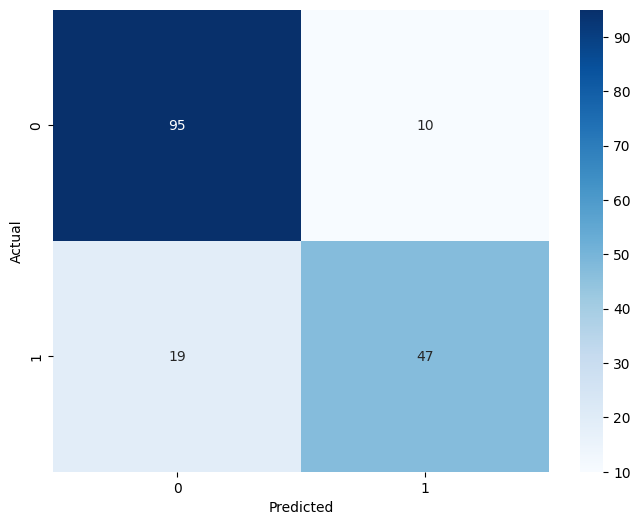

In [54]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, rf_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [55]:
start_id = 892
ids = list(range(start_id, start_id + len(predictions)))

submission = pd.DataFrame({
    'PassengerId': ids,
    'Survived': predictions
})

submission['Survived'] = submission['Survived'].astype(int)
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [56]:
submission.to_csv('titanic_submission.csv', index=False)